# 1. Imports

In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
# Read the datafile
df = pd.read_csv('eod_data_1.csv')

In [3]:
df.head()

,date,open,high,low,close,volume
0,2007-04-02,5267.70,5267.70,4946.55,4959.65,12535000
1,2007-04-03,4961.30,5048.60,4921.80,4995.15,14984000
2,2007-04-04,4997.05,5108.15,4997.05,5031.75,9251000
3,2007-04-05,5035.90,5151.25,4985.30,5129.20,10120000
4,2007-04-09,5129.05,5335.95,5129.05,5323.80,9708000


In [4]:
# Convert 'date' column to datetime and set as index
df.set_index(pd.to_datetime(df['date']), inplace=True)

# Drop the original 'date' column
df.drop(columns=['date'], inplace=True)

In [5]:
df.head()

,open,high,low,close,volume
date,,,,,
2007-04-02,5267.70,5267.70,4946.55,4959.65,12535000
2007-04-03,4961.30,5048.60,4921.80,4995.15,14984000
2007-04-04,4997.05,5108.15,4997.05,5031.75,9251000
2007-04-05,5035.90,5151.25,4985.30,5129.20,10120000
2007-04-09,5129.05,5335.95,5129.05,5323.80,9708000


In [6]:
df.tail(20)

,open,high,low,close,volume
date,,,,,
2024-02-14,45014.6500,46170.4500,44860.7500,45908.3000,279950000
2024-02-15,46027.1000,46297.7000,45590.2000,46218.9000,277740000
2024-02-16,46454.3000,46693.4000,46264.4000,46384.8500,291380000
2024-02-19,46554.9000,46717.4000,46317.7000,46535.5000,158390000
2024-02-20,46444.9000,47136.7500,46367.8000,47094.2000,171890000
2024-02-21,47363.4000,47363.4000,46886.9500,47019.7000,198950000
2024-02-22,46934.5500,47024.0500,46426.8500,46919.8000,177180000
2024-02-23,47060.7000,47245.3500,46723.1500,46811.7500,200520000
2024-02-26,46615.8500,46893.1500,46513.5500,46576.5000,223680000


In [7]:
df.shape

(4191, 5)

# 2. Add Technical Indicators

In [8]:
# Compute Simple Moving Averages
df['sma_10'] = df['close'].rolling(window=10).mean()
df['sma_20'] = df['close'].rolling(window=20).mean()
df['sma_50'] = df['close'].rolling(window=50).mean()

# Compute Exponential Moving Averages
df['ema_50'] = df.ta.ema(length=50, close='close')
df['ema_200d'] = df.ta.ema(length=200, close='close')

# Compute high and low of the last 250 days
df['hi_250d'] = df['high'].rolling(window=250).max()
df['lo_250d'] = df['low'].rolling(window=250).min()

# Compute previous close
df['prev_close'] = df['close'].shift(1)

# Compute change percentage
df['change_p'] = df['close'].pct_change() * 100

# Compute average volume
df['avgvol_14d'] = df['volume'].rolling(window=14).mean()
df['avgvol_50d'] = df['volume'].rolling(window=50).mean()
df['avgvol_200d'] = df['volume'].rolling(window=200).mean()

# Compute RSI
df['rsi'] = ta.rsi(df['close'], length=14)

# Compute MACD
macd_indicators = df.ta.macd(fast=12, slow=26, signal=9)
df = pd.concat([df, macd_indicators], axis=1)


df['vwap'] = df.ta.vwap(high='high', low='low', close='close', volume='volume')

# Add Stochastic Oscillator
df[['stoch_k', 'stoch_d']] = df.ta.stoch(high='high', low='low', close='close')

# Add ADX
adx = df.ta.adx(high='high', low='low', close='close')
df = pd.concat([df, adx], axis=1)

# Add Accumulation/Distribution Line
df['ad_line'] = df.ta.ad(high='high', low='low', close='close', volume='volume')

# 3. Data Exploration

In [9]:
df.head(1000)

,open,high,low,close,volume,sma_10,sma_20,sma_50,ema_50,ema_200d,...,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,vwap,stoch_k,stoch_d,ADX_14,DMP_14,DMN_14,ad_line
date,,,,,,,,,,,,,,,,,,,,,
2007-04-02,5267.70,5267.70,4946.55,4959.65,12535000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5057.966667,NaN,NaN,NaN,NaN,NaN,-1.151237e+07
2007-04-03,4961.30,5048.60,4921.80,4995.15,14984000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4988.516667,NaN,NaN,NaN,NaN,NaN,-9.160782e+06
2007-04-04,4997.05,5108.15,4997.05,5031.75,9251000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5045.650000,NaN,NaN,NaN,NaN,NaN,-1.263303e+07
2007-04-05,5035.90,5151.25,4985.30,5129.20,10120000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5088.583333,NaN,NaN,NaN,NaN,NaN,-5.202346e+06
2007-04-09,5129.05,5335.95,5129.05,5323.80,9708000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5262.933333,NaN,NaN,NaN,NaN,NaN,3.365469e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-04-11,11591.00,11637.00,11551.75,11597.80,12854000,11700.280,11334.4050,10938.301,11185.555455,10940.248520,...,236.717476,13.961432,222.756044,11595.516667,81.032564,85.039596,29.056224,28.852236,13.471933,6.631669e+08
2011-04-13,11531.45,11856.35,11490.55,11839.50,15317000,11725.980,11390.0900,10962.254,11211.200339,10949.196295,...,240.613808,14.286212,226.327596,11728.800000,82.722504,82.979045,30.278771,32.405420,11.933366,6.770728e+08
2011-04-15,11810.10,11950.70,11707.60,11735.65,17418000,11723.025,11428.9925,10987.343,11231.766993,10957.021705,...,232.640122,5.050020,227.590102,11797.983333,80.321666,81.358911,31.670712,32.889439,11.031682,6.636744e+08


In [10]:
df.tail()


,open,high,low,close,volume,sma_10,sma_20,sma_50,ema_50,ema_200d,...,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,vwap,stoch_k,stoch_d,ADX_14,DMP_14,DMN_14,ad_line
date,,,,,,,,,,,,,,,,,,,,,
2024-03-05,47265.6992,47737.8516,47196.7500,47581.0000,176900,46860.16500,46439.71500,46677.746000,46411.799108,44978.526566,...,279.460775,141.955220,137.505555,47505.200533,94.961873,91.335771,13.347195,26.833030,19.120769,1.016292e+10
2024-03-06,47451.6484,48161.2500,47442.2500,47965.3984,301700,46964.72484,46587.38492,46682.556968,46472.724570,45008.246683,...,345.614729,166.487340,179.127390,47856.299467,93.606479,95.015385,14.176784,29.345712,17.621915,1.016306e+10
2024-03-07,48035.8008,48071.6992,47747.1992,47835.8008,146300,47067.12992,46697.44746,46673.628984,46526.178540,45036.381550,...,383.167851,163.232369,219.935482,47884.899733,90.529565,93.032639,14.947117,28.268676,16.975162,1.016299e+10
2024-03-11,47792.1992,47853.8008,47230.6484,47327.8516,204200,47142.26508,46819.72754,46650.015016,46557.616699,45059.182247,...,367.703063,118.214065,249.488998,47470.766933,81.933731,88.689925,14.572720,26.274412,21.625465,1.016285e+10
2024-03-12,47351.3516,47812.7500,46884.4492,47282.3984,207200,47211.69992,46908.72746,46629.817984,46586.039511,45081.303801,...,347.770532,78.625227,269.145305,47326.532533,72.825242,81.762846,13.590488,23.603096,23.218469,1.016282e+10


In [11]:
print(f"Date is from dates between {df.index[0]} and {df.index[-1]}")

Date is from dates between 2007-04-02 00:00:00 and 2024-03-12 00:00:00


In [12]:
# Check the number of duplicates
df.isna().sum()

open               0
high               0
low                0
close              0
volume             0
sma_10             9
sma_20            19
sma_50            49
ema_50            49
ema_200d         199
hi_250d          249
lo_250d          249
prev_close         1
change_p           1
avgvol_14d        13
avgvol_50d        49
avgvol_200d      199
rsi               14
MACD_12_26_9      25
MACDh_12_26_9     33
MACDs_12_26_9     33
vwap               0
stoch_k           15
stoch_d           17
ADX_14            27
DMP_14            14
DMN_14            14
ad_line            0
dtype: int64

In [13]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'sma_10', 'sma_20', 'sma_50',
       'ema_50', 'ema_200d', 'hi_250d', 'lo_250d', 'prev_close', 'change_p',
       'avgvol_14d', 'avgvol_50d', 'avgvol_200d', 'rsi', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'vwap', 'stoch_k', 'stoch_d',
       'ADX_14', 'DMP_14', 'DMN_14', 'ad_line'],
      dtype='object')

In [14]:
# Create the response columns, using the predictor values from the next day
df['op_nxt'] = df['open'].shift(-1)
df['hi_nxt'] = df['high'].shift(-1)
df['lo_nxt'] = df['low'].shift(-1)
df['cl_nxt'] = df['close'].shift(-1)

# Move these columns to be beginning of the dataframe
columns = ['op_nxt', 'hi_nxt', 'lo_nxt', 'cl_nxt', 'open', 'high', 'low', 'close', 'volume', 
           'sma_10', 'sma_20', 'sma_50', 'ema_50', 'ema_200d', 'hi_250d', 'lo_250d', 
           'prev_close', 'change_p', 'avgvol_14d', 'avgvol_50d', 'avgvol_200d', 'rsi', 
           'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'vwap', 
           'stoch_k', 'stoch_d', 'ADX_14', 'DMP_14', 'DMN_14', 'ad_line']

df = df[columns]


In [15]:
df.head(10)

,op_nxt,hi_nxt,lo_nxt,cl_nxt,open,high,low,close,volume,sma_10,...,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,vwap,stoch_k,stoch_d,ADX_14,DMP_14,DMN_14,ad_line
date,,,,,,,,,,,,,,,,,,,,,
2007-04-02,4961.30,5048.60,4921.80,4995.15,5267.70,5267.70,4946.55,4959.65,12535000,NaN,...,NaN,NaN,NaN,5057.966667,NaN,NaN,NaN,NaN,NaN,-1.151237e+07
2007-04-03,4997.05,5108.15,4997.05,5031.75,4961.30,5048.60,4921.80,4995.15,14984000,NaN,...,NaN,NaN,NaN,4988.516667,NaN,NaN,NaN,NaN,NaN,-9.160782e+06
2007-04-04,5035.90,5151.25,4985.30,5129.20,4997.05,5108.15,4997.05,5031.75,9251000,NaN,...,NaN,NaN,NaN,5045.650000,NaN,NaN,NaN,NaN,NaN,-1.263303e+07
2007-04-05,5129.05,5335.95,5129.05,5323.80,5035.90,5151.25,4985.30,5129.20,10120000,NaN,...,NaN,NaN,NaN,5088.583333,NaN,NaN,NaN,NaN,NaN,-5.202346e+06
2007-04-09,5335.40,5349.75,5229.75,5325.50,5129.05,5335.95,5129.05,5323.80,9708000,NaN,...,NaN,NaN,NaN,5262.933333,NaN,NaN,NaN,NaN,NaN,3.365469e+06
2007-04-10,5325.30,5374.25,5261.30,5276.65,5335.40,5349.75,5229.75,5325.50,9197000,NaN,...,NaN,NaN,NaN,5301.666667,NaN,NaN,NaN,NaN,NaN,8.845348e+06
2007-04-11,5241.15,5241.15,5176.45,5215.15,5325.30,5374.25,5261.30,5276.65,5527000,NaN,...,NaN,NaN,NaN,5304.066667,NaN,NaN,NaN,NaN,NaN,4.820596e+06
2007-04-12,5234.50,5404.10,5230.90,5362.10,5241.15,5241.15,5176.45,5215.15,5884000,NaN,...,NaN,NaN,NaN,5210.916667,NaN,NaN,NaN,NaN,NaN,5.975570e+06
2007-04-13,5400.30,5465.50,5400.30,5435.10,5234.50,5404.10,5230.90,5362.10,10973000,NaN,...,NaN,NaN,NaN,5332.366667,NaN,NaN,NaN,NaN,NaN,1.162679e+07


In [16]:
# Check the datatuypes
print(df.dtypes)

op_nxt           float64
hi_nxt           float64
lo_nxt           float64
cl_nxt           float64
open             float64
high             float64
low              float64
close            float64
volume             int64
sma_10           float64
sma_20           float64
sma_50           float64
ema_50           float64
ema_200d         float64
hi_250d          float64
lo_250d          float64
prev_close       float64
change_p         float64
avgvol_14d       float64
avgvol_50d       float64
avgvol_200d      float64
rsi              float64
MACD_12_26_9     float64
MACDh_12_26_9    float64
MACDs_12_26_9    float64
vwap             float64
stoch_k          float64
stoch_d          float64
ADX_14           float64
DMP_14           float64
DMN_14           float64
ad_line          float64
dtype: object


In [17]:
# Check the missing values
df.isna().sum()

op_nxt             1
hi_nxt             1
lo_nxt             1
cl_nxt             1
open               0
high               0
low                0
close              0
volume             0
sma_10             9
sma_20            19
sma_50            49
ema_50            49
ema_200d         199
hi_250d          249
lo_250d          249
prev_close         1
change_p           1
avgvol_14d        13
avgvol_50d        49
avgvol_200d      199
rsi               14
MACD_12_26_9      25
MACDh_12_26_9     33
MACDs_12_26_9     33
vwap               0
stoch_k           15
stoch_d           17
ADX_14            27
DMP_14            14
DMN_14            14
ad_line            0
dtype: int64

In [18]:
df.shape

(4191, 32)

In [19]:
# Drop all the rows with missing values
df = df.dropna()

In [20]:
df.shape

(3941, 32)

In [21]:
df.isna().sum()

op_nxt           0
hi_nxt           0
lo_nxt           0
cl_nxt           0
open             0
high             0
low              0
close            0
volume           0
sma_10           0
sma_20           0
sma_50           0
ema_50           0
ema_200d         0
hi_250d          0
lo_250d          0
prev_close       0
change_p         0
avgvol_14d       0
avgvol_50d       0
avgvol_200d      0
rsi              0
MACD_12_26_9     0
MACDh_12_26_9    0
MACDs_12_26_9    0
vwap             0
stoch_k          0
stoch_d          0
ADX_14           0
DMP_14           0
DMN_14           0
ad_line          0
dtype: int64

In [22]:
# Save the dataframe as csv
df.to_csv('data_ml_1.csv', index=True)

In [23]:
# Define the response and the predictors
response = df['cl_nxt'] # following day's close
predictors = df[['open', 'high', 'low', 'volume', 'close',
           'sma_10', 'sma_20', 'sma_50', 'ema_50', 'ema_200d', 'hi_250d', 'lo_250d', 
           'prev_close', 'change_p', 'avgvol_14d', 'avgvol_50d', 'avgvol_200d', 'rsi', 
           'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'vwap', 
           'stoch_k', 'stoch_d', 'ADX_14', 'DMP_14', 'DMN_14', 'ad_line']] # ohlc, volume, & techncial indicators

In [24]:
# First, concatenate predictors and response in the same DataFrame
df_combined = pd.concat([predictors, response], axis=1)
df_combined.shape

(3941, 29)

G:\My Drive\Northwestern MS\422\Project 2.0\.venv\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


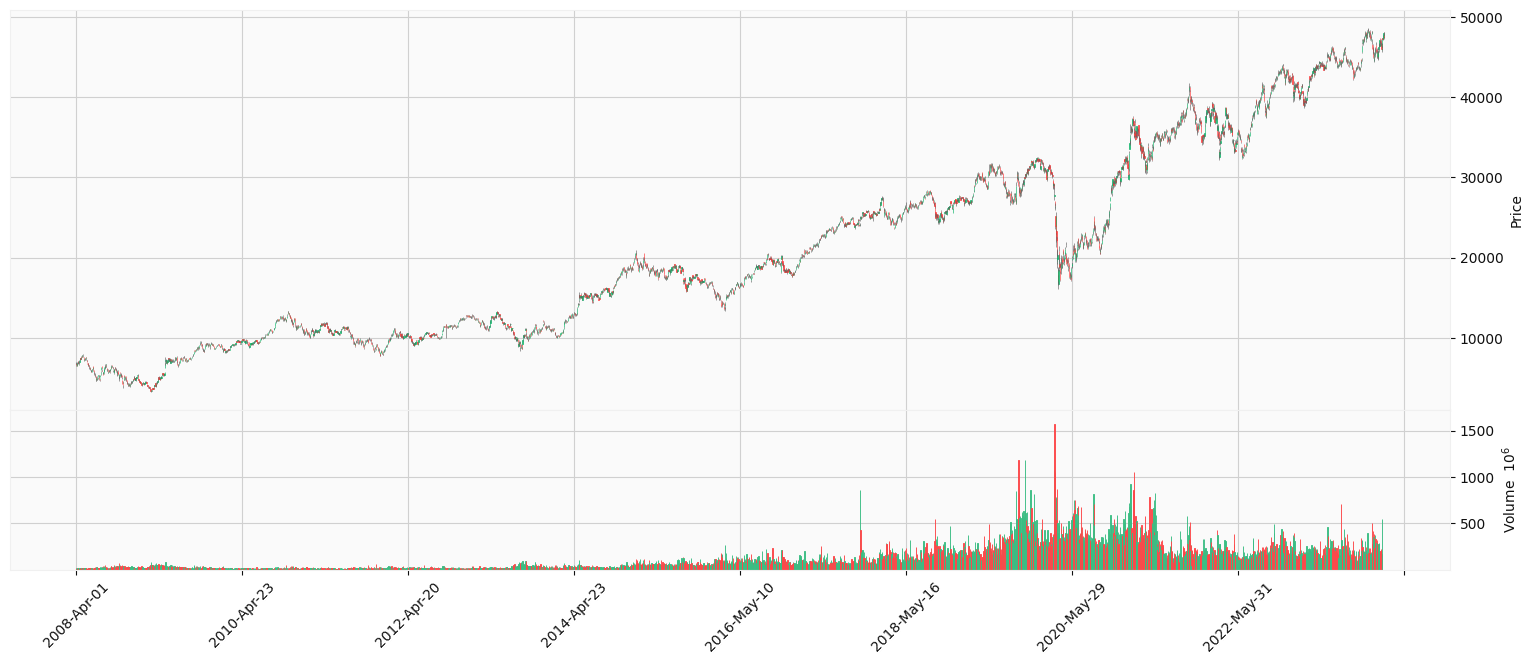

In [25]:
# Plot the candlestick
figsize = (20,8)
df_candlestick = df[['open', 'high', 'low', 'volume', 'close']]
mpf.plot(df_candlestick, type='candle', style='yahoo', volume=True, figsize=figsize)

Candlesticks on a chart represent price movements within a set period, displaying the open, high, low, and close values, with the body's color indicating whether the closing price was higher (usually green) or lower (usually red) than the opening price. Trends are discerned from the direction and patterns of these candlesticks over time, indicating an upward, downward, or sideways market movement. Volume bars complement candlesticks by showing the quantity of an asset traded during the corresponding period; tall bars indicate high trading activity, which can validate the strength of a price move, while short bars suggest less trading activity and potentially less conviction in the price trend.

This Bank Nifty chart presents an upward trajectory from 2008 to 2022 with discernible periods of highs and lows. The lows or dips, where there is a noticeable decline in the index value, can be spotted at specific intervals which could be associated with broader economic downturns or sector-specific challenges. One such significant dip appears to occur around 2020, which aligns with the global financial impact of the COVID-19 pandemic—a period known for its high market volatility and uncertainty.

Regarding trading volume, we see peaks that often correspond with the index's price fluctuations. For instance, increased volume during the lows suggests heightened trading activity, which often occurs when investors react to market stress by selling off assets, while elevated volumes during the highs may reflect increased buying activity as investor confidence grows and they re-enter the market to capitalize on the anticipated recovery and growth. These volume peaks provide a narrative of investor sentiment, with high volumes in downturns indicating potential capitulation or high selling pressure, and high volumes in upswings suggesting strong buying interest.

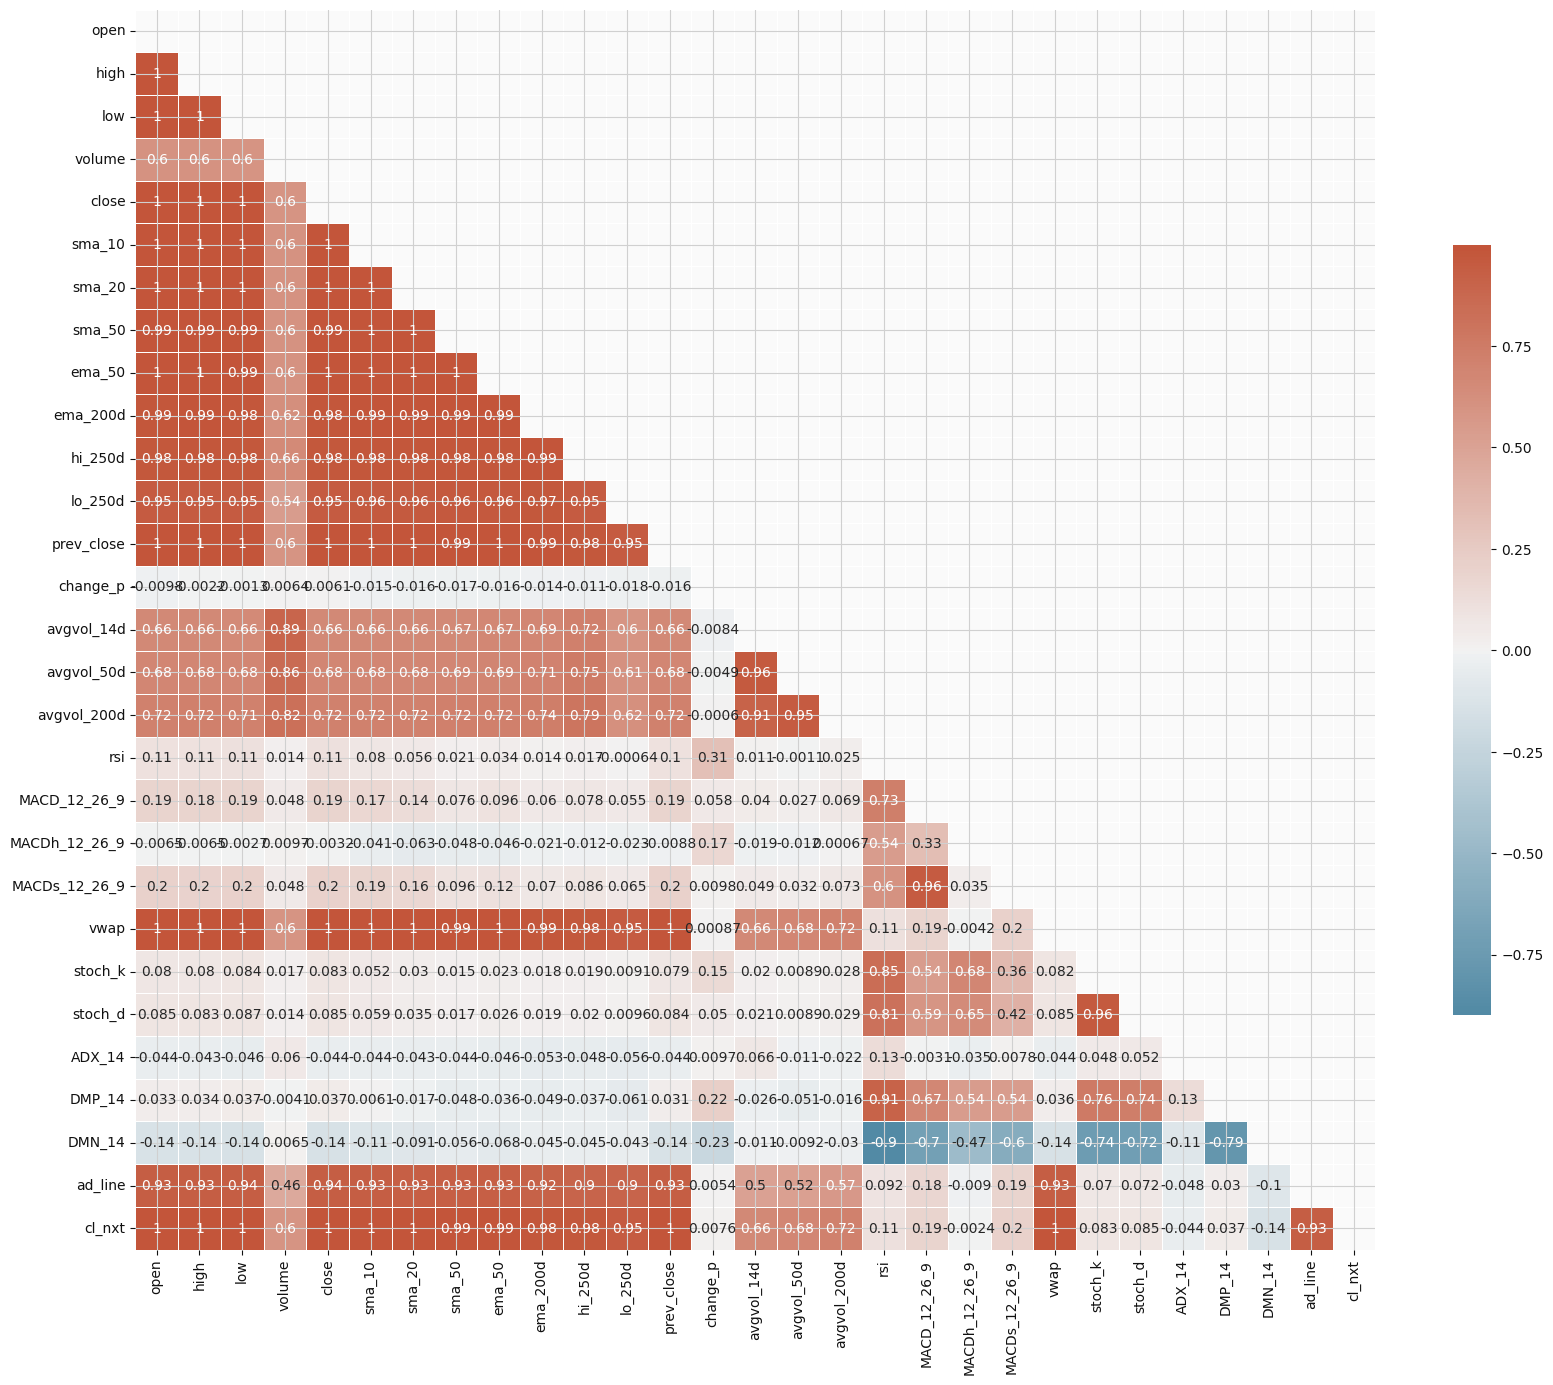

In [26]:
# Plot the heatmap


# Compute the correlation matrix
corr = df_combined.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In the heatmap, the indicators 'open', 'high', 'low', 'volume', and the moving averages 'sma_10', 'sma_20', 'ema_50', and 'ema_200d' have high positive correlation coefficients, mostly close to +1, represented by the deep red color. This indicates that these variables typically move together; when one goes up, the others tend to go up as well, and vice versa. This is expected as they are all directly related to the price action of a security.

On the other hand, indicators like 'DMN_14', 'ad_line' (Advance/Decline Line), and 'd_nxt' appear to have less consistent relationships with the other variables. For instance, 'DMN_14' shows strong negative correlations (blue squares) with several of the price-related indicators, suggesting that when the price indicators are increasing, 'DMN_14' tends to decrease, and this can be characteristic of the indicator showing strength in downward price movements. The 'ad_line' shows a mix of positive and negative correlations with other indicators but tends to be less strongly correlated overall, indicating that its movements are not as closely tied to price changes. 

The 'cl_nxt' variable shows a range of correlations with different financial indicators. For most indicators, such as 'open', 'high', 'low', 'volume', and various moving averages like 'sma_10', 'sma_20', 'ema_50', and 'ema_200d', the correlation coefficients are near 0, denoting a very weak or no linear relationship. This implies that these indicators from the current or previous days do not consistently predict the next day's closing price. However, there are a few indicators with a stronger relationship; for instance, 'cl_nxt' shows a moderately negative correlation with 'DMN_14', as indicated by a lighter blue square. This suggests that the previous day's 'DMN_14' values have some degree of inverse association with the next day's closing price, though it's not strong enough to be highly predictive.

In [27]:
# Identifying Strong Correlations
correlation_matrix = predictors.corrwith(response)

# Identify predictors that have an absolute correlation greater than 0.5 with response
significant_correlations = (correlation_matrix[correlation_matrix.abs() > 0.5]).sort_values(ascending=False)

print(significant_correlations)

close          0.999640
vwap           0.999602
high           0.999512
low            0.999504
open           0.999352
prev_close     0.999238
sma_10         0.998459
sma_20         0.997013
ema_50         0.994738
sma_50         0.992779
ema_200d       0.984634
hi_250d        0.976693
lo_250d        0.954150
ad_line        0.934893
avgvol_200d    0.715614
avgvol_50d     0.680441
avgvol_14d     0.659396
volume         0.599147
dtype: float64


The correlations listed with 'cl_nxt' are extremely high, especially with 'close', 'vwap' (volume-weighted average price), 'high', 'low', and 'open', all above 0.999. This indicates an almost perfect linear relationship; as these variables change, the next day's closing price is likely to move in the same direction nearly one-to-one. 

Moving averages like 'sma_10', 'sma_20', 'ema_50', 'sma_50', and 'ema_200d' also show very high correlations, decreasing slightly as the number of days in the moving average increases, which suggests that while these are still highly predictive of the next day's close, the relationship is slightly less direct due to the smoothing effect of these indicators over more extended periods.

'hi_250d' and 'lo_250d' represent the 250-day highs and lows, and they also correlate highly, but less so than the daily indicators, reflecting that historical extremes have a lesser, yet still strong, influence on the next day's closing price.

'ad_line' or advance-decline line, a cumulative measure of the number of advancing and declining issues on an exchange, shows a strong correlation but less so than price-related indicators, hinting that broader market movements have a significant, but less immediate, impact on the next day's closing price.

Average volumes over longer periods ('avgvol_200d', 'avgvol_50d', and 'avgvol_14d') show moderate correlations, indicating that higher trading volumes can influence the next day's price, possibly through sustained buying or selling pressure, but with less predictive power than price movements.

Lastly, 'volume' has the lowest correlation of the listed indicators, suggesting that while there is some relationship between trading volume on a given day and the next day's closing price, the connection is weaker, potentially due to daily volume being influenced by short-term events that may not have a lasting impact on price.

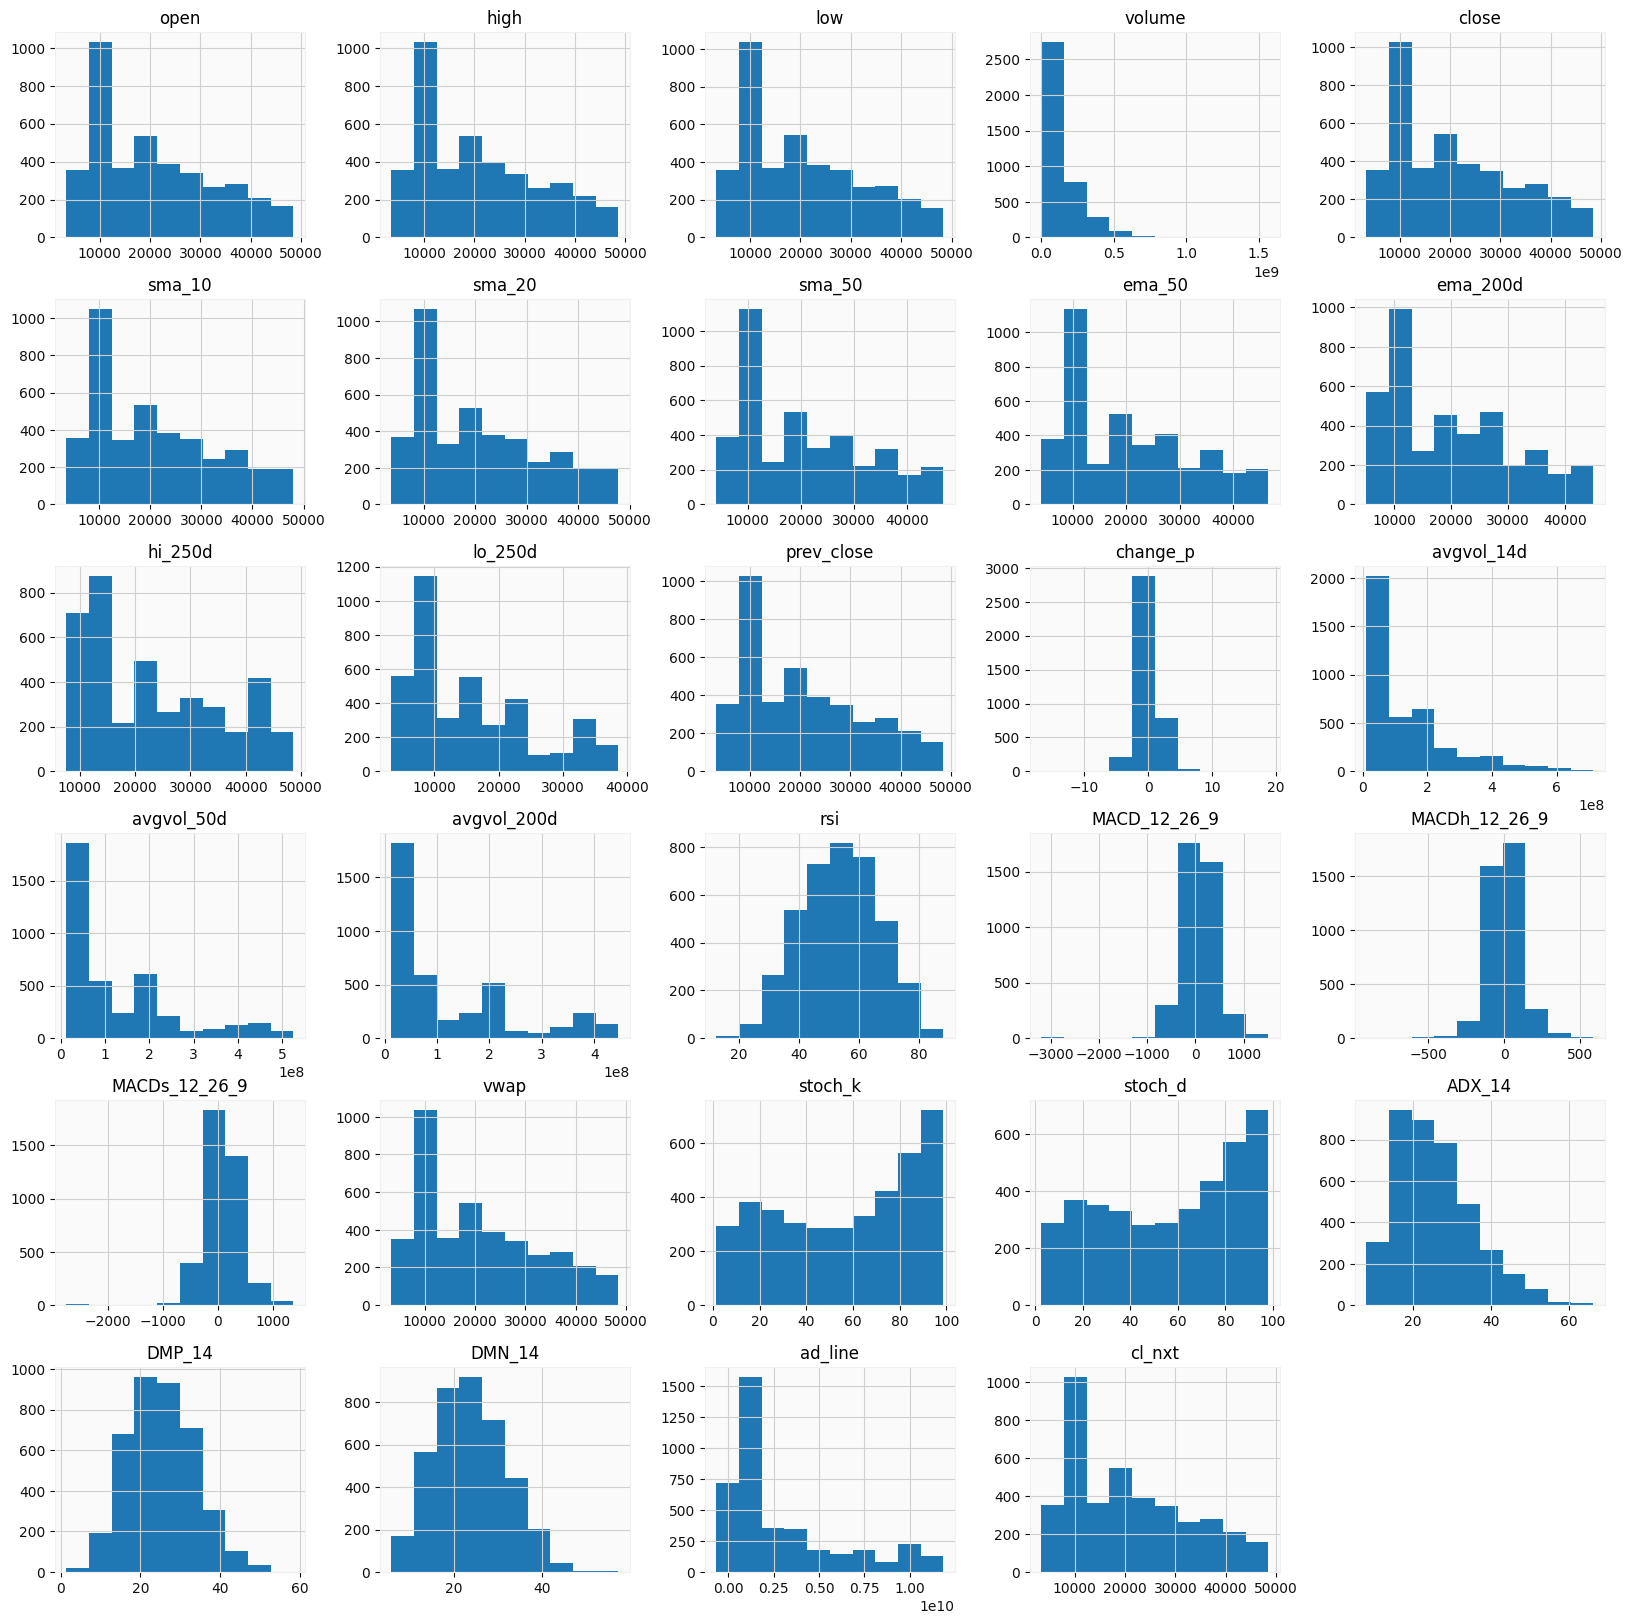

In [28]:
import matplotlib.pyplot as plt
df_combined.hist(figsize=(20,20))
plt.show()

The 'open', 'high', 'low', 'close', 'sma_10', 'sma_20', 'sma_50', 'ema_50', 'ema_200d', 'hi_250d', 'lo_250d', 'prev_close', and 'cl_nxt' histograms have a right-skewed distribution, indicating a higher frequency of lower values and fewer high values.

The 'volume', 'avgvol_50d', 'avgvol_200d', and 'avgvol_14d' histograms display a highly right-skewed distribution, suggesting a concentration of data points towards the lower end of the volume scale with very few instances of extremely high volume.

The 'change_p' histogram seems to be normally distributed around 0, with tails extending to both positive and negative changes, indicating that price changes fluctuate symmetrically around no change.

The 'rsi', 'stock_k', 'stock_d', 'DMP_14', and 'DMN_14' histograms appear to have a more uniform or slightly bimodal distribution, indicating that the data points are spread out across the range of values, with some concentrations in specific intervals.

The 'MACD_12_26_9' and 'MACDh_12_26_9' histograms show a distribution centered around zero, with the MACD histogram being slightly left-skewed, suggesting more frequent occurrence of negative values.

The 'wvap', 'ad_line', and 'ADX_14' histograms are moderately skewed, indicating that while there's a range of values, there's a tendency toward one end of the spectrum.

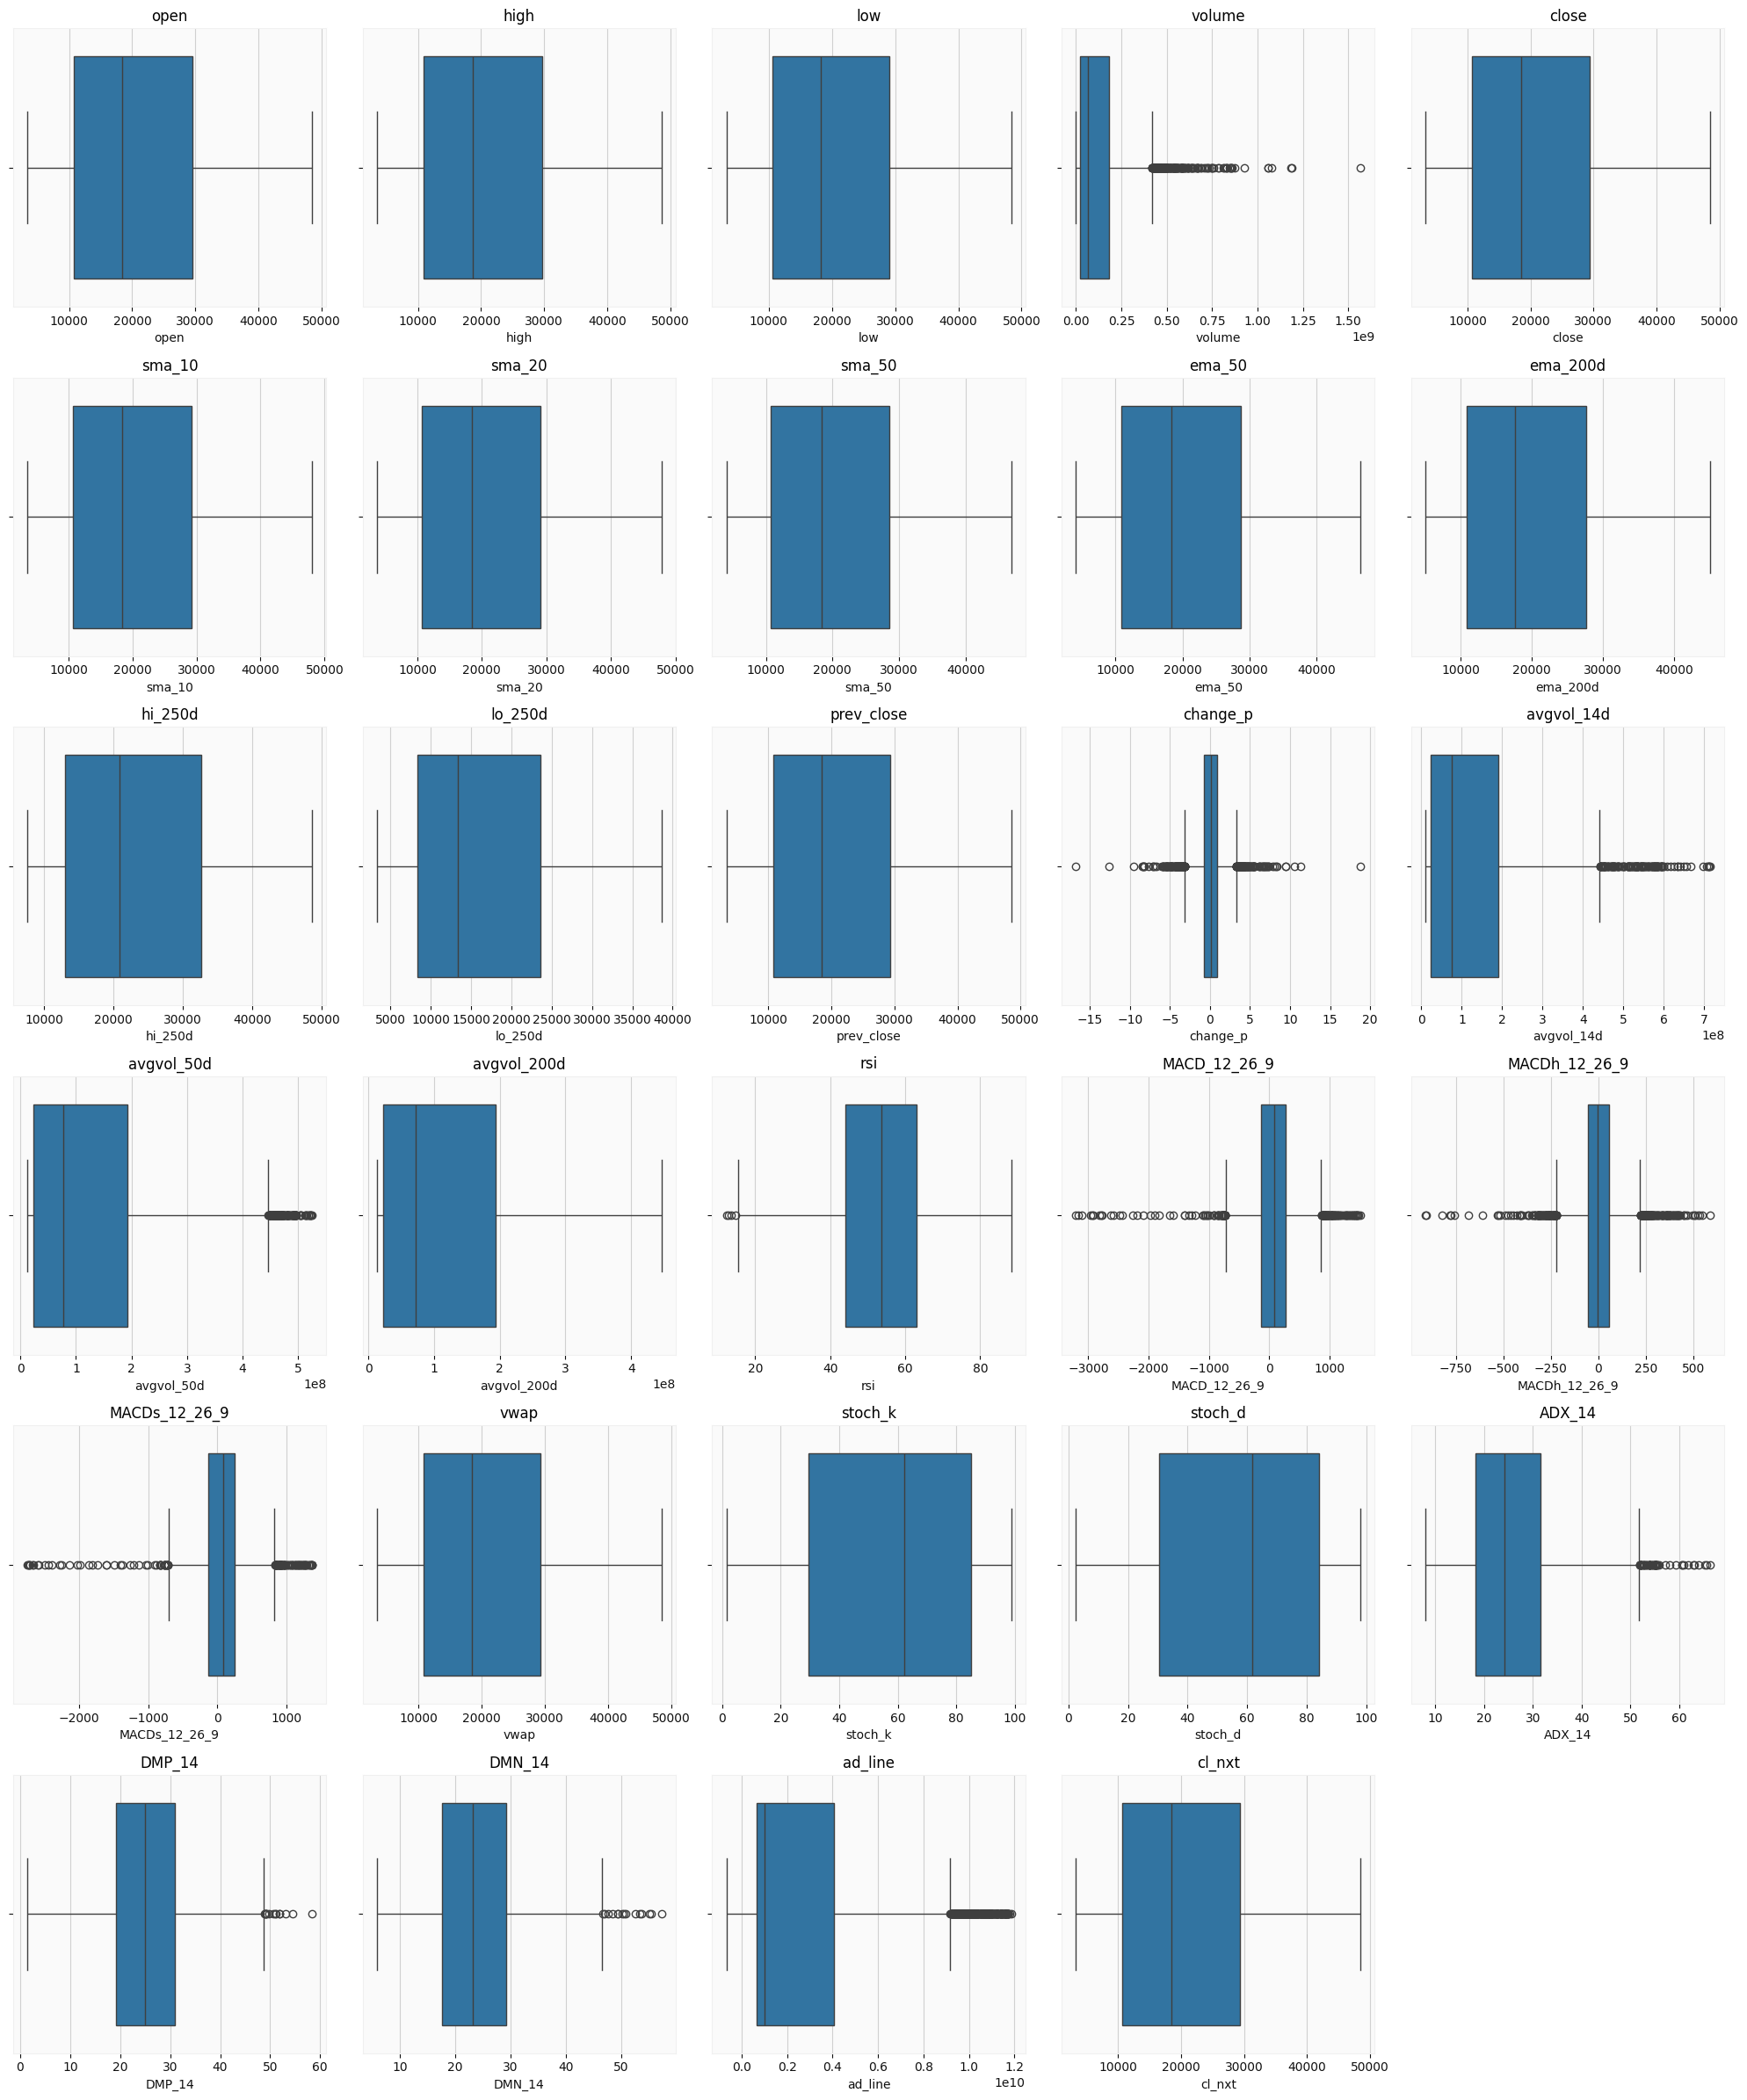

In [29]:
# Plot the boxplots
features = df_combined.columns
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 24)) # adjust the size as needed
axs = axs.flatten() # to iterate over the grid easily

for i, column in enumerate(features):
    sns.boxplot(x=df_combined[column], ax=axs[i])
    axs[i].title.set_text(column)

# In case of less than 30 features, delete unused subplots
if len(features) < 30:
    for i in range(len(features), 30):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

For 'open', 'high', 'low', 'close', 'sma_10', 'sma_20', 'sma_50', 'ema_50', 'ema_200d', 'hi_250d', 'lo_250d', 'prev_close', 'wvap', 'stock_k', and 'stock_d', the box plots show a relatively symmetrical distribution with the median line near the center of the box, suggesting a more or less even distribution of data around the median.

The 'volume', 'avgvol_50d', 'avgvol_200d', and 'avgvol_14d' indicators have box plots with a line (median) closer to the bottom of the box, indicating a right-skewed distribution, with a few outliers indicating instances of extremely high volume.

'change_p', 'MACD_12_26_9', 'MACDh_12_26_9', and 'ADX_14' display box plots with medians close to zero but with various spreads and outliers, indicating occasional extreme values or fluctuations from the typical range.

The 'rsi' indicator's box plot shows the median closer to the upper quartile, which might indicate a distribution that is slightly skewed towards higher values.

Outliers are shown as individual points outside the 'whiskers' of the box plots, which represent 1.5 times the interquartile range (the distance between Q1 and Q3). These outliers suggest that there are values that deviate significantly from the rest of the distribution.

## Summary Data Exploration: 

### The data exploration reveals that Bank Nifty’s price-related indicators ('open', 'high', 'low', 'close', and various moving averages) generally move in tandem, as evidenced by the near-perfect correlation coefficients with 'cl_nxt', the next day's closing price. These indicators also show right-skewed distributions, suggesting a higher occurrence of lower values. 'Volume' and average volume indicators exhibit right-skewed distributions in both box plots and histograms, indicating that most trading days have low to moderate volume, with occasional spikes reflecting periods of high trading activity. Such spikes in volume are often associated with significant price movements, hinting at reactive trading during times of market stress or heightened investor interest.

### The histograms for 'change_p' and the MACD indicators center around zero, revealing that day-to-day price changes and momentum oscillations are normally distributed, which indicates a balanced dynamic of price fluctuations around a mean value. The RSI's distribution leans towards higher values, suggesting a period of generally positive momentum for Bank Nifty.

### The overall trend of Bank Nifty from 2008 to 2022 is positive, with noticeable dips correlating to broader market downturns, such as the 2020 COVID-19 market impact. Recovery post-dips suggests resilience in the banking index, and the peaks in trading volume around these lows and subsequent highs signal active market participation, with investors likely selling during downturns and buying during upturns.